# Import Libraries

In [88]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load Dataset from Kaggle

In [89]:
file_path = "countries.csv"

# Load the latest version
countries_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mexwell/countries-states-and-cities-around-the-world",
  file_path,
)
countries_df.head()

/tmp/ipython-input-89-4281012492.py:4: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  countries_df = kagglehub.load_dataset(


,id,name,iso3,iso2,numeric_code,phone_code,capital,currency,currency_name,currency_symbol,tld,native,region,subregion,timezones,latitude,longitude,emoji,emojiU
0,1,Afghanistan,AFG,AF,4,93,Kabul,AFN,Afghan afghani,؋,.af,افغانستان,Asia,Southern Asia,"[{zoneName:'Asia\/Kabul',gmtOffset:16200,gmtOf...",33.000000,65.0,🇦🇫,U+1F1E6 U+1F1EB
1,2,Aland Islands,ALA,AX,248,+358-18,Mariehamn,EUR,Euro,€,.ax,Åland,Europe,Northern Europe,"[{zoneName:'Europe\/Mariehamn',gmtOffset:7200,...",60.116667,19.9,🇦🇽,U+1F1E6 U+1F1FD
2,3,Albania,ALB,AL,8,355,Tirana,ALL,Albanian lek,Lek,.al,Shqipëria,Europe,Southern Europe,"[{zoneName:'Europe\/Tirane',gmtOffset:3600,gmt...",41.000000,20.0,🇦🇱,U+1F1E6 U+1F1F1
3,4,Algeria,DZA,DZ,12,213,Algiers,DZD,Algerian dinar,دج,.dz,الجزائر,Africa,Northern Africa,"[{zoneName:'Africa\/Algiers',gmtOffset:3600,gm...",28.000000,3.0,🇩🇿,U+1F1E9 U+1F1FF
4,5,American Samoa,ASM,AS,16,+1-684,Pago Pago,USD,US Dollar,$,.as,American Samoa,Oceania,Polynesia,"[{zoneName:'Pacific\/Pago_Pago',gmtOffset:-396...",-14.333333,-170.0,🇦🇸,U+1F1E6 U+1F1F8


# Extract columns needed

In [90]:
countries_df=countries_df[['name','capital','region']]
countries_df.head()

,name,capital,region
0,Afghanistan,Kabul,Asia
1,Aland Islands,Mariehamn,Europe
2,Albania,Tirana,Europe
3,Algeria,Algiers,Africa
4,American Samoa,Pago Pago,Oceania


In [91]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     250 non-null    object
 1   capital  245 non-null    object
 2   region   248 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


# Take a sample

In [92]:
countries_df=countries_df.sample(10)

# Build a directed graph

In [93]:
G=nx.DiGraph()

In [94]:
triples=[]
for _, row in countries_df.iterrows():
    country = row["name"]
    triples.append((country, "has_capital", row["capital"]))
    triples.append((country, "in_region", row["region"]))

In [95]:
for subj, rel, obj in triples:
    G.add_edge(subj, obj, label=rel)

# Styling the nodes

In [96]:
country_nodes = countries_df["name"].tolist()
capital_nodes = countries_df["capital"].tolist()
region_nodes = countries_df["region"].unique().tolist()

In [97]:
node_colors = []
for node in G.nodes():
    if node in country_nodes:
        node_colors.append("orange")
    elif node in capital_nodes:
        node_colors.append("lightgreen")
    elif node in region_nodes:
        node_colors.append("lightcoral")
    else:
        node_colors.append("gray")

# Visualize the Graph

/tmp/ipython-input-98-2968616032.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


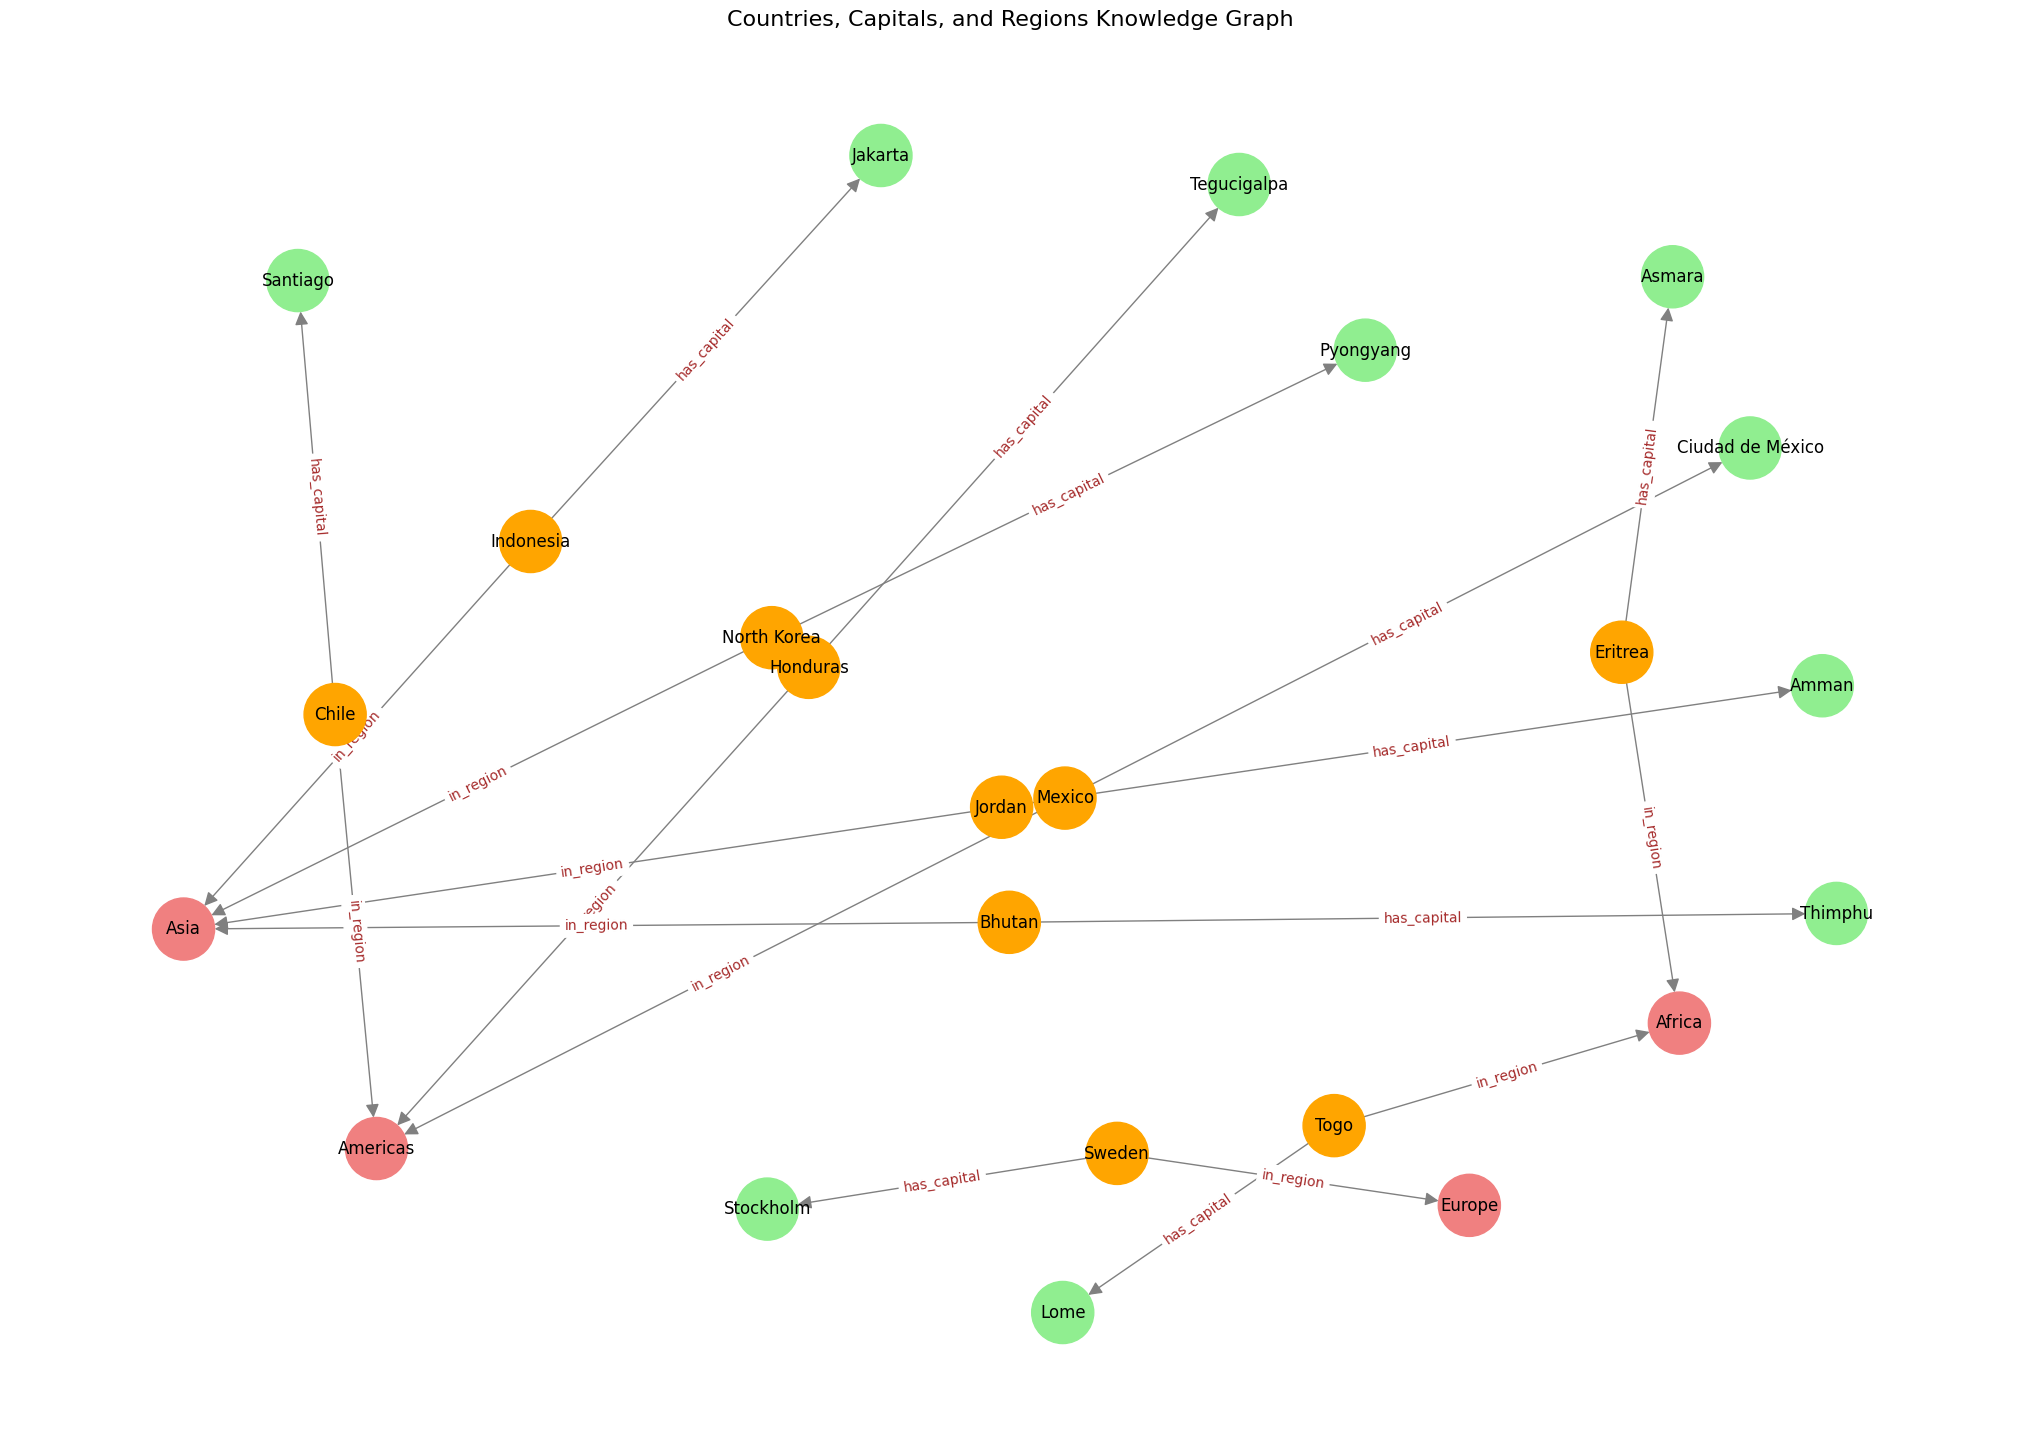

In [98]:
plt.figure(figsize=(20, 14))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos,with_labels=True,node_color=node_colors,node_size=2000,font_size=12,edge_color="gray",arrows=True,arrowstyle='-|>',arrowsize=20)

edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="brown", font_size=10)

plt.title("Countries, Capitals, and Regions Knowledge Graph", fontsize=16)
plt.tight_layout()
plt.show()
